MY FIRST DEEP LEARNING MODEL AM SO EXCITED :)

In [1]:
import pandas as pd
import tensorflow
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Mark Mwema\\Desktop\\DeepLearning\\Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


STARTING THE DATA CLEANING AMD FEATURE ENGINEERING

In [3]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# FEARURE ENGINEERING
dummies = pd.get_dummies(data, columns=['Geography','Gender'], drop_first=True)#one hot encoding,dropfirst helps prevent overfitting of the model
data = dummies
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


SPLITTING DATA INTO FEATURES AND EXPECTED OUTPUT

In [5]:
y = data['Exited']
X = data.drop('Exited', axis=1)

SCALING THE DATA (feature scaling)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

SPLITTING DATA INTO TRAINING DATASET AND TEST DATASET

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CREATING THE ANN (ARTIFICIAL NEURAL NETWORK)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
# droput is used to prevent overfitting however it is not used in the output layer how it works
#  is that it randomly drops some neurons during training to prevent the model from relying too much on any one neuron

IMPLEMENT 2ND REGULARIZATION THE EARLY STOPPING

In [52]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

COMPILING THE SEQUENTIAL MODEL

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

TRAINING THE MODEL THIS IS EXCITING :)

In [54]:
model_history=model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.33, callbacks=[early_stop])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8072 - loss: 0.4141 - val_accuracy: 0.7910 - val_loss: 0.4192
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7936 - loss: 0.4171 - val_accuracy: 0.7910 - val_loss: 0.4117
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8056 - loss: 0.4127 - val_accuracy: 0.7910 - val_loss: 0.4179
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7926 - loss: 0.4359 - val_accuracy: 0.7910 - val_loss: 0.4125
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7885 - loss: 0.4298 - val_accuracy: 0.7910 - val_loss: 0.4202
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8023 - loss: 0.4130 - val_accuracy: 0.7910 - val_loss: 0.4099
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7927 - loss: 0.4219 - val_accuracy: 0.7910 - val_loss: 0.4178
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8007 - loss: 0.4169 - val_accu

In [49]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

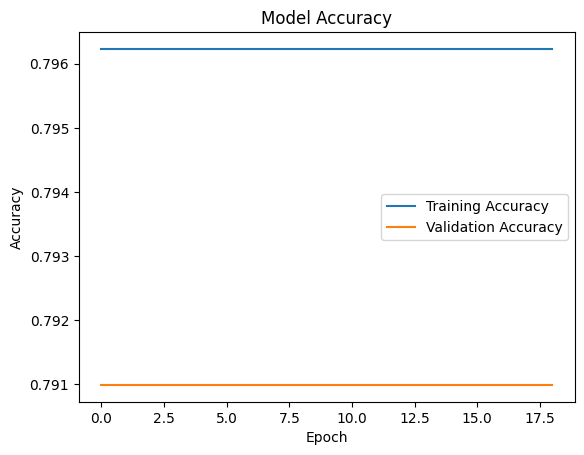

In [55]:
plt.plot(model_history.history.get('accuracy'))
plt.plot(model_history.history.get('val_accuracy'))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

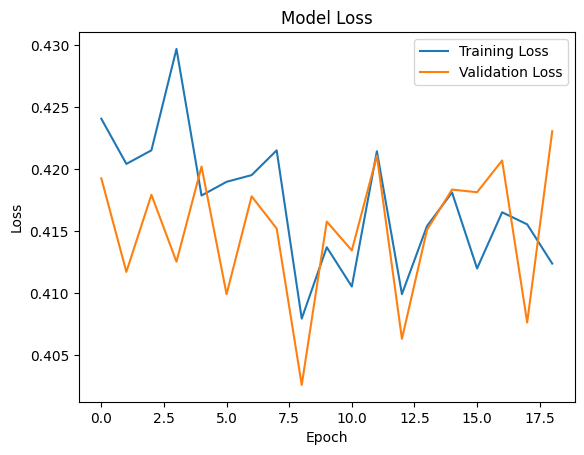

In [56]:
plt.plot(model_history.history.get('loss'))
plt.plot(model_history.history.get('val_loss'))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

TRYING TO MAKE PREDICTIONS

In [57]:
model.predict(X_test)
predictions = (model.predict(X_test) > 0.5)
predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\Mark Mwema\Desktop\DeepLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Mark Mwema\Desktop\DeepLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Mark Mwema\Desktop\DeepLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

AttributeError: 'function' object has no attribute 'shape'

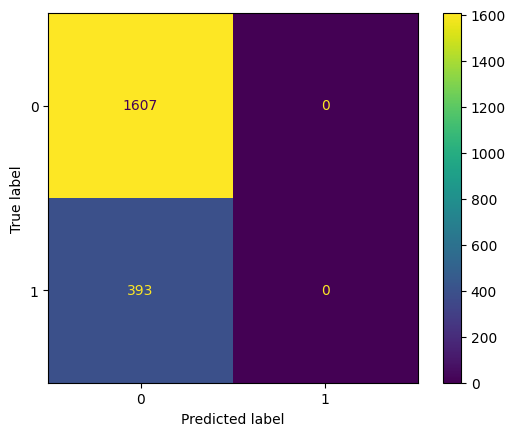

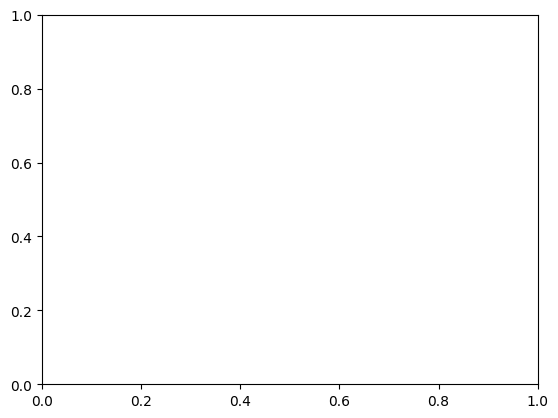

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[0,1])
display.from_predictions(y_test,predictions)
display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,predictions)
score

0.8035